Checking the cases volume

In [24]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [5]:
tqdm.pandas()

In [14]:
df = pd.read_excel(r'raw\Client Case\lm legalcase 2022-06-06T2054.xlsx', sheet_name = 'Sheet1')

C:\Users\rApiiNel\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Overall Case Count Trend

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Case Posted Month         7347 non-null   datetime64[ns]
 1   Categories Category Name  7347 non-null   object        
 2   Case Case Count           7347 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 172.3+ KB


In [ ]:
# Y

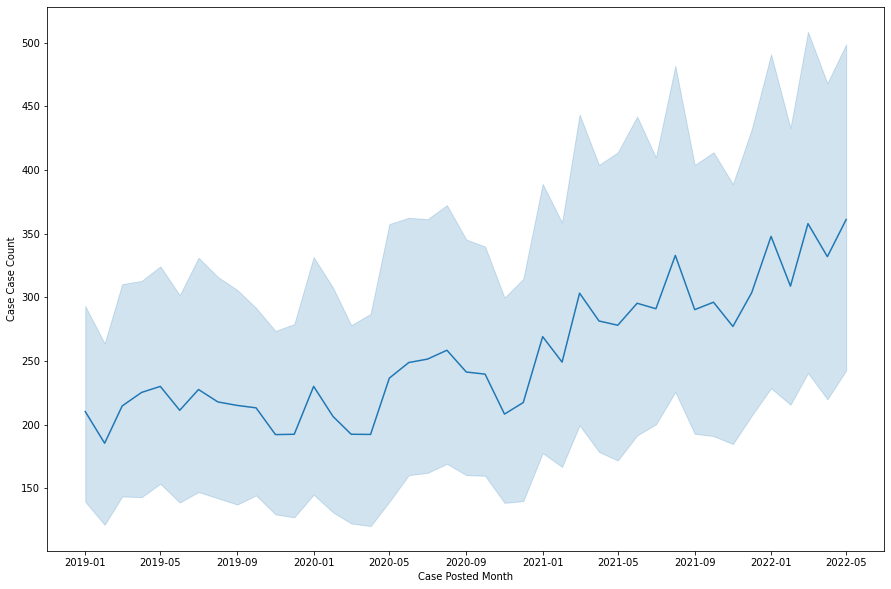

In [26]:
plt.figure(figsize = (15,10))
ax = sns.lineplot(data = df, x = "Case Posted Month", y ="Case Case Count")
# _ = ax.set_xticklabels(labels = df['Case Posted Month'], rotation = 90)

Insights:
1. Overall volume of that we received has an increasing trend 

### Getting the specific practice areas

In [30]:
case_practice_area_volume = df.pivot_table(index = 'Categories Category Name', values = 'Case Case Count', aggfunc = 'sum').sort_values(by = 'Case Case Count', ascending = False)

In [31]:
case_practice_area_volume.head()

,Case Case Count
Categories Category Name,
Child Custody and Visitation,283061
Child Support,133114
Wrongful Termination,106480
Landlord and Tenant,97068
Employment Discrimination,76426


<AxesSubplot:xlabel='Case Case Count', ylabel='Categories Category Name'>

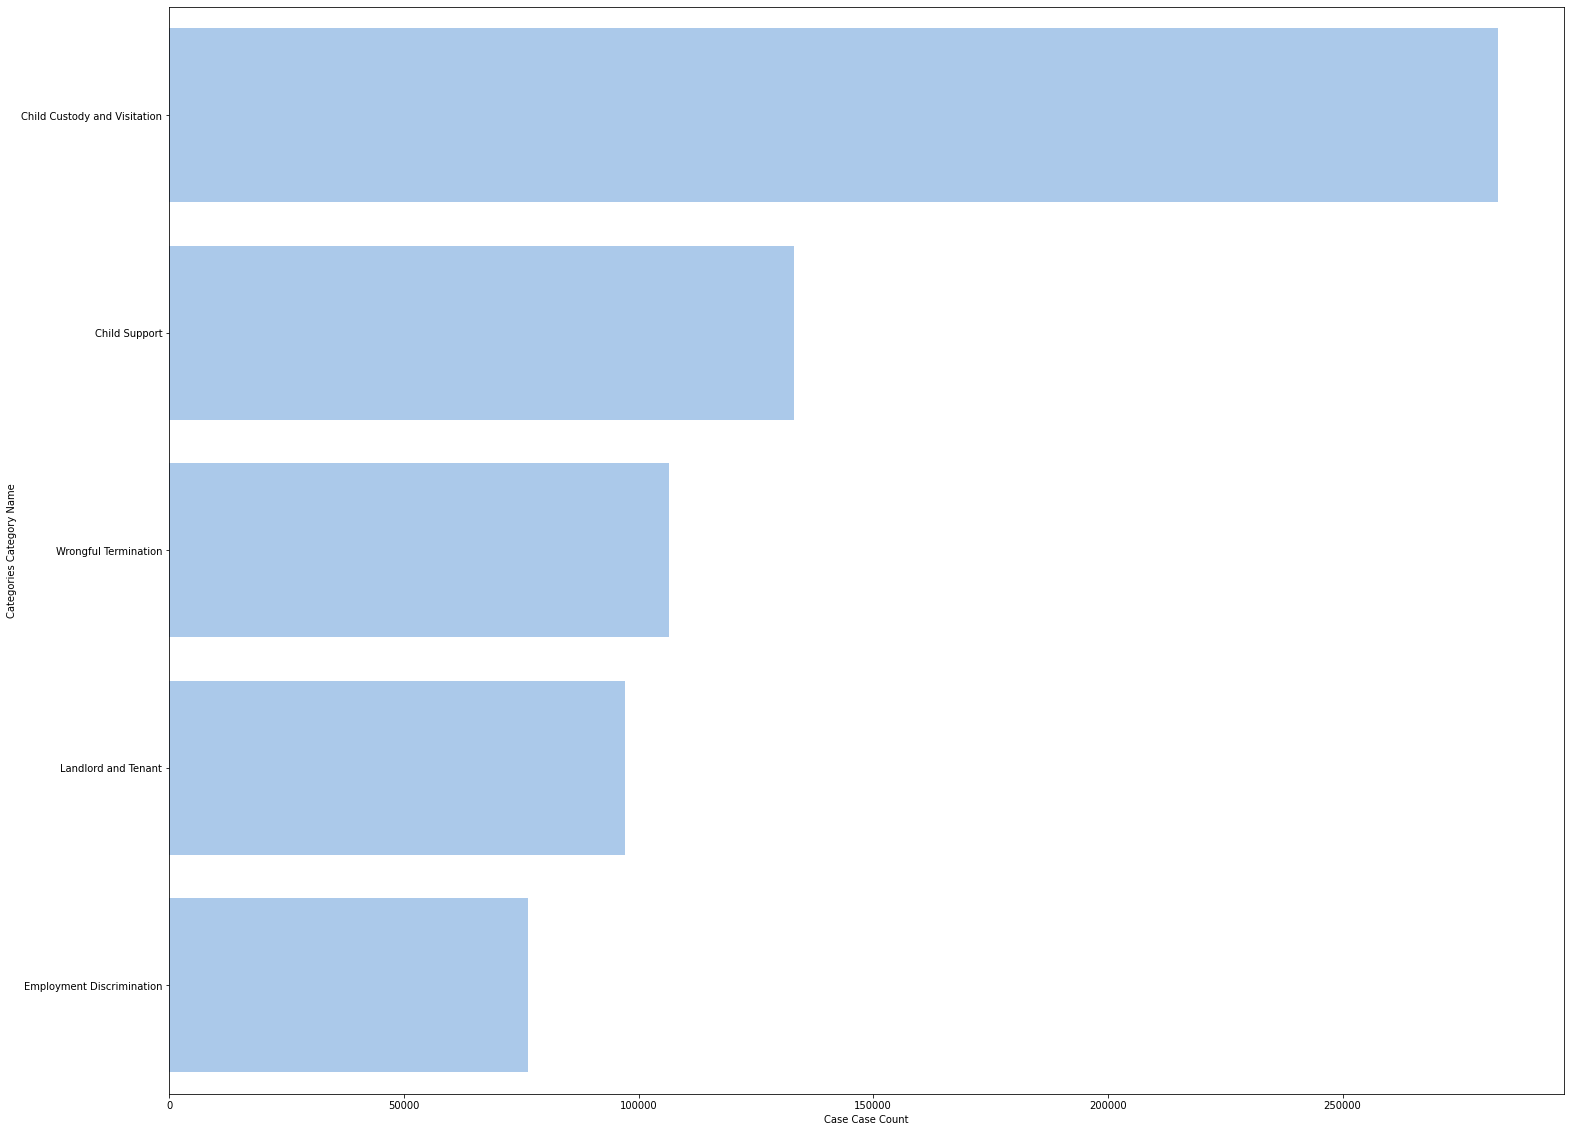

In [38]:
sns.set_color_codes('pastel')
plt.figure(figsize= (25,20))
sns.barplot(data = case_practice_area_volume.head(), y = case_practice_area_volume.head().index, x = 'Case Case Count', color = 'b')